In [1]:
from sklearn import datasets
import pandas as pd
pd.set_option('display.max_columns', None)
import sys
sys.path.append('../../')

diabetes = datasets.load_diabetes()
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
target = pd.Series(diabetes.target, name='target')
df = pd.concat([data, target], axis=1)

In [2]:
import pandas as pd
import tabularmagic as tm

c:\Users\rzrya\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
mtcars = pd.read_csv("mtcars_data/mtcars.csv")

In [4]:
analyzer = tm.Analyzer(mtcars, test_size=0.2, name='mtcars dataset from r')
analyzer

INFO: Analyzer initialized. Shapes of train, test DataFrames: (25, 11), (7, 11). 


mtcars dataset from r 
----------------------------------------------------------------------------------------
Train shape: (25, 11)                        Test shape: (7, 11)                        
----------------------------------------------------------------------------------------
Categorical variables:
  None 
                                                                                        
Numerical variables:
  'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb' 

In [8]:
lm_report = analyzer.glm(
    formula='hp ~ am + qsec',
    family = "poisson"
)
#type(lm_report)
print(lm_report.statsmodels_summary())
lm_report.train_report().plot_residuals_vs_fitted(type = 'pearson', show_outliers = 'standardized')

lm_report.step()


                 Generalized Linear Model Regression Results                  
Dep. Variable:                     hp   No. Observations:                   25
Model:                            GLM   Df Residuals:                       22
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -148.96
Date:                Wed, 24 Jul 2024   Deviance:                       130.79
Time:                        23:51:14   Pearson chi2:                     131.
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1569      0.489     18.738      0.0

AttributeError: 'PoissonRegressionReport' object has no attribute '_target'

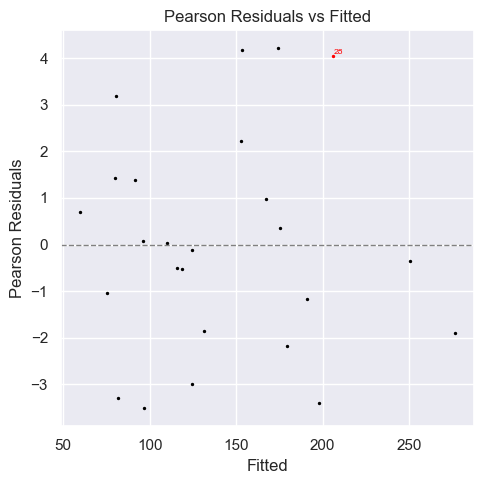

In [ ]:
lm_report.train_report().plot_residuals_vs_fitted(type = 'pearson')

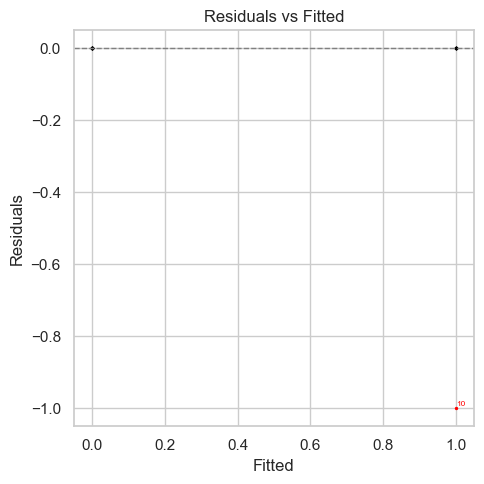

In [23]:
bin_report = analyzer.glm(
    formula='am ~ drat',
    family = "binomial"
)
bin_report.train_report().plot_residuals_vs_fitted()
